Here is the link to the source code: https://github.com/pchoi7/pchoi7.github.io/blob/main/posts/Perceptron/perceptron.py

In [1]:
from perceptron import Perceptron

### Perceptron Implementation

In order to perform the perceptron, I created a fit function. In this fit function, I initiate a feature matrix $\tilde{X}$ of 1's. The weight vector is given a random number and a for loop is made to perform the perceptron update. In this for loop, the score is appended into the history and the weight is updated using the equation below:


$\tilde{w}^{(t+1)} = \tilde{w}^{(t)} + \mathbb{1}(\tilde{y}_{i}\langle \tilde{w}^{(t)},\tilde{x}_{i}\rangle < 0)\tilde{y}_{i}\tilde{x}_{i}$

### Experiment (Linearly Separable)

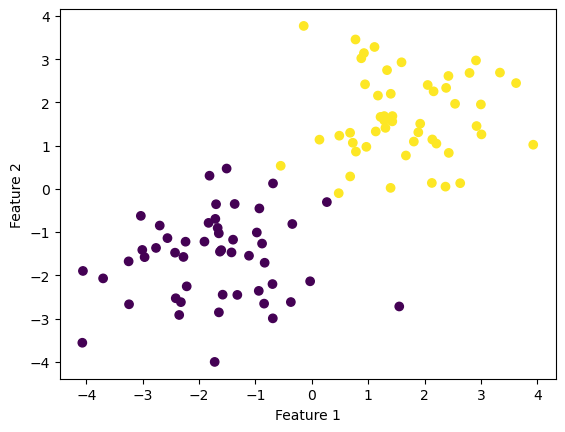

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

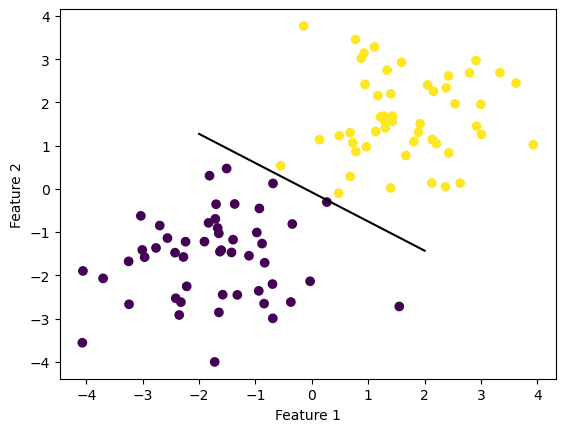

In [3]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

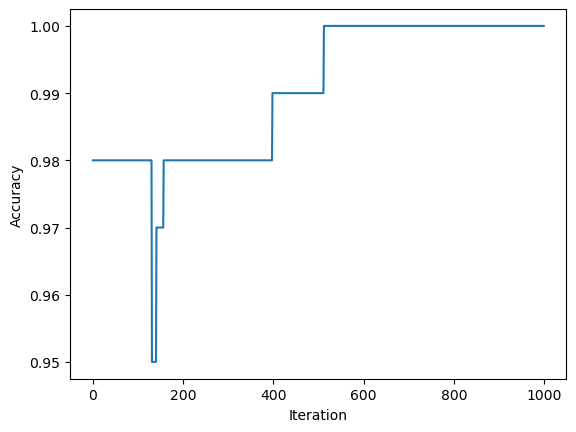

In [4]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In [5]:
print("The accuracy of the perceptron is " + str(p.score(X, y)))
print("Score evolution over time is " + str(p.history[-10:]))

The accuracy of the perceptron is 1.0
Score evolution over time is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Experiment (Non-linearly Separable)

For this part of the experiment, the graph was set up so that it would be impossible to be linearly separable. We can see that the data cannot be separated linearly because some of the purple points overlap the yellow data. The accuracy for this data set will never reach 100%.

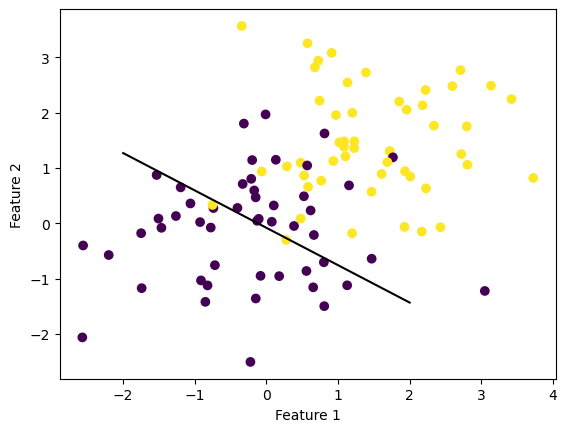

In [6]:
np.random.seed(12345)

p_2 = Perceptron()

X_2, y_2 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-0.2, -0.2), (1.5, 1.5)])

fig_2 = plt.scatter(X_2[:,0], X_2[:,1], c = y)
fig_2 = draw_line(p.w, -2, 2)

xlab_2 = plt.xlabel("Feature 1")
ylab_2 = plt.ylabel("Feature 2")

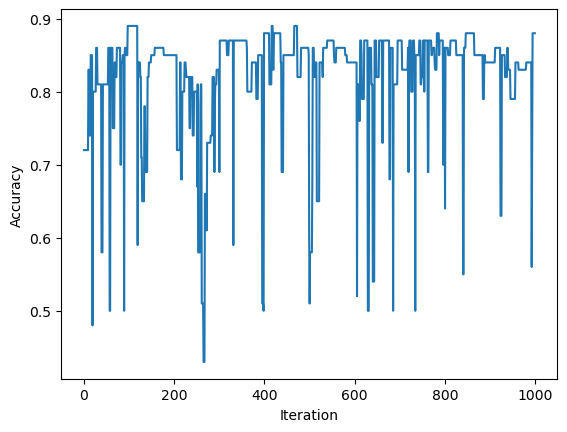

In [17]:
fig_2 = plt.plot(p_2.history)
xlab_2 = plt.xlabel("Iteration")
ylab_2 = plt.ylabel("Accuracy")

In [8]:
p_2 = Perceptron()
p_2.fit(X_2, y_2, max_steps = 1000)

print("The accuracy of the perceptron is " + str(p_2.score(X_2, y_2)))
print("Score evolution over time is " + str(p_2.history[-10:]))

The accuracy of the perceptron is 0.88
Score evolution over time is [0.84, 0.84, 0.56, 0.71, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88]


We can see that with this data set, the accuracy may fall well below 50-60% for a few iterations. Overall, the perceptron algorithm is pretty accurate (88%).

### Experiment (Multi-dimensional)

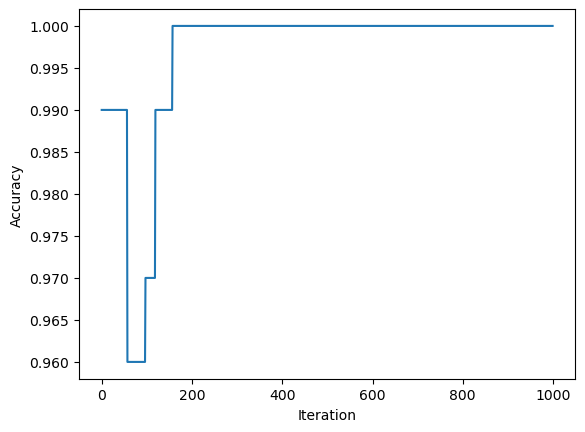

In [15]:
np.random.seed(12345)

p_3 = Perceptron()

p_features = 10
X_3, y_3 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.8, -1.8), (1.8, 1.8)])

p_3.fit(X_3, y_3, max_steps = 1000)

fig_3 = plt.plot(p_3.history)
xlab_3 = plt.xlabel("Iteration")
ylab_3 = plt.ylabel("Accuracy")

In [16]:
print("The accuracy of the perceptron is " + str(p_3.score(X_3, y_3)))
print("Score evolution over time is " + str(p_3.history[-10:]))

The accuracy of the perceptron is 1.0
Score evolution over time is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


This data set of 9 dimensions is linearly separable because it reaches 1.0 accuracy.

### Runtime Complexity

For a single iteration of the perceptron algorithm update, the runtime is O(p). The operations that affect the equation $\tilde{w}^{(t+1)} = \tilde{w}^{(t)} + \mathbb{1}(\tilde{y}_{i}\langle \tilde{w}^{(t)},\tilde{x}_{i}\rangle < 0)\tilde{y}_{i}\tilde{x}_{i}$ is the dot product, multiplication, then addition. Performing the dot product is O(p) + O(p), while performing multiplication and addition is O(1) for both. Therefore, the runtime for equation 1 is O(p).